# k-Nearest Neighbors (k-NN) Regressor - No Brainer

In this notebook, we create a K-NN regressor model using Scikit-Learn to solve a regression problem. 

- The goal is to show how to use Scikit-Learn to create a K-NN regressor model. 

We use the default values for most of the hyperparameters and don't perform any model selection.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsRegressor

## Dataset

We create a 1D synthetic nonlinear dataset (X). Each datapoint has a real-number label (y).

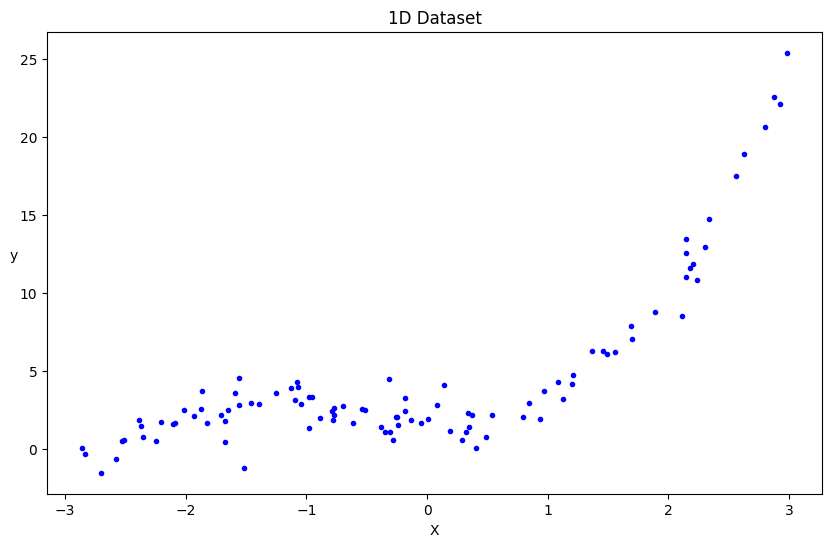

In [2]:
n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X**3 + X**2 + 2 + np.random.randn(n, 1)


fig = plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.") 
plt.title("1D Dataset")
plt.ylabel("y", rotation=0)
plt.xlabel("X")
plt.show()

## k-NN Model for Regression

We create a k-NN regressor model. For this simple illustration, we don't perform any hyperparameter tuning.


### Evaluation Metric

We use the Coefficient of Determination denoted by $R^2$ or $r^2$ as the evaluation metric. 

R-squared is a statistical measure of how close the data are to the fitted regression line. R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

- 0% indicates that the model explains none of the variability of the response data around its mean.
- 100% indicates that the model explains all the variability of the response data around its mean.

In general, the higher the R-squared, the better the model fits your data. 

#### Compute $R^2$ using the sklearn:
- The "score" function of the K-NN Regression object

Training: Coefficient of Determination (R^2):  1.0
Test: Coefficient of Determination (R^2):  0.9397129676477857


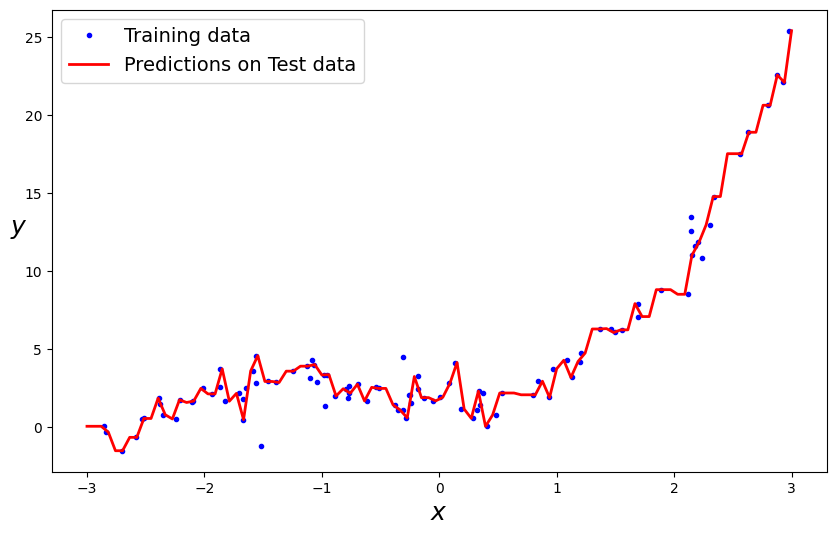

In [3]:
# Create the k-NN Regressor Model
knn =  KNeighborsRegressor(n_neighbors=1)
knn.fit(X, y)


'''
We create a test dataset for prediction
'''
X_test = np.linspace(-3, 3, 100).reshape(100, 1)
y_test = 0.5 * X_test**3 + X_test**2 + 2 + np.random.randn(100, 1)


# Prediction using the test data
y_test_predicted = knn.predict(X_test)


# Compute train R^2 score
R2_train = knn.score(X, y)
print("Training: Coefficient of Determination (R^2): ", R2_train)


# Compute test R^2 score
R2_test = knn.score(X_test, y_test)
print("Test: Coefficient of Determination (R^2): ", R2_test)

fig = plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.", label="Training data")
plt.plot(X_test, y_test_predicted, "r-", linewidth=2, label="Predictions on Test data")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()